# TO DO

 1. Change all the features in correct format
 2. Create new features for time, distance and speed

### Univariate Analysis
 3. Check distribution for continuous variables (skewness and kurtosis)
 4. Check distribution for categorical variables
 5. Understand and treat outliers

### Bivariate Analysis
 6. continuous - continuous
 7. Categorical Continuous
 8. Categorical Categorical

### end
 

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [4]:
#importing the data
taxi_data = pd.read_csv("nyc_taxi_trip_duration.csv")

In [12]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [13]:
taxi_data.shape

(729322, 11)

In [14]:
#check for null values
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

##  1. Change all the features in correct format

In [15]:
taxi_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [17]:
taxi_data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

1. vendor_id, passenger_count, store_and_fwd_flag can be categorical
2. pickup_datetime, dropoff_datetime can be datetime


In [5]:
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('category')
taxi_data['store_and_fwd_flag'] = taxi_data['store_and_fwd_flag'].astype('category')

taxi_data['pickup_datetime'] =  pd.to_datetime(taxi_data['pickup_datetime'])
taxi_data['dropoff_datetime'] =  pd.to_datetime(taxi_data['dropoff_datetime'])


In [24]:
taxi_data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

##  2. Create new features for time, distance and speed

In [9]:
#taxi_data['pickup_month'] = taxi_data['pickup_datetime'].apply(lambda x:x.month)
#taxi_data['pickup_day'] = taxi_data['pickup_datetime'].apply(lambda x:x.day)
#taxi_data['pickup_weekday'] = taxi_data['pickup_datetime'].apply(lambda x:x.weekday())
taxi_data['pickup_weekday_name'] = taxi_data['pickup_datetime'].apply(lambda x:x.day_name())

taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].apply(lambda x:x.hour)
#taxi_data['pickup_min'] = taxi_data['pickup_datetime'].apply(lambda x:x.minute)
#taxi_data['pickup_time'] = taxi_data['pickup_hour'] + (taxi_data['pickup_min']/60)

In [10]:
#taxi_data['dropoff_month'] = taxi_data['dropoff_datetime'].apply(lambda x:x.month)
#taxi_data['dropoff_day'] = taxi_data['dropoff_datetime'].apply(lambda x:x.day)
#taxi_data['dropoff_weekday'] = taxi_data['dropoff_datetime'].apply(lambda x:x.weekday())
taxi_data['dropoff_weekday_name'] = taxi_data['dropoff_datetime'].apply(lambda x:x.day_name())

taxi_data['dropoff_hour'] = taxi_data['dropoff_datetime'].apply(lambda x:x.hour)
#taxi_data['dropoff_min'] = taxi_data['dropoff_datetime'].apply(lambda x:x.minute)
#taxi_data['dropoff_time'] = taxi_data['dropoff_hour'] + (taxi_data['dropoff_min']/60)

In [20]:
taxi_data.drop('dropoff_month', axis=1, inplace=True)
#taxi_data.drop('pickup_month', axis=1, inplace=True)

In [34]:
pip install geopy

  Using cached https://files.pythonhosted.org/packages/0c/67/915668d0e286caa21a1da82a85ffe3d20528ec7212777b43ccd027d94023/geopy-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8b/62/26ec95a98ba64299163199e95ad1b0e34ad3f4e176e221c40245f211e425/geographiclib-1.50-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
from geopy.distance import great_circle

In [22]:
#change longitude and latitude in redable format

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km


In [23]:
taxi_data['distance'] = taxi_data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [24]:
taxi_data['speed'] = taxi_data['distance']/(taxi_data['trip_duration']/3600)

## Univariate Analysis
 3. Check distribution for continuous variables (skewness and kurtosis)


In [40]:
taxi_data.dtypes

id                              object
vendor_id                     category
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count               category
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
store_and_fwd_flag            category
trip_duration                    int64
pickup_weekday_name             object
pickup_hour                      int64
dropoff_weekday_name            object
dropoff_hour                     int64
distance                       float64
speed                          float64
dtype: object

In [25]:
continuous_columns = taxi_data.select_dtypes(include = ["float", 'int64']).columns
continuous_columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'pickup_hour', 'dropoff_hour',
       'distance', 'speed'],
      dtype='object')

In [26]:
#removing pickup location and dropoff location
# #hashing it out so I don't run this code again
continuous_columns = continuous_columns.delete([0,1,2,3])

In [70]:
taxi_data[continuous_columns].describe().round(2)

,trip_duration,pickup_hour,dropoff_hour,distance,speed
count,729186.00,729186.00,729186.00,729186.00,729186.00
mean,951.65,13.61,13.61,3.43,14.37
std,3862.14,6.40,6.49,3.90,7.79
min,1.00,0.00,0.00,0.00,0.00
25%,397.00,9.00,9.00,1.23,9.12
50%,663.00,14.00,14.00,2.10,12.80
75%,1075.00,19.00,19.00,3.88,17.84
max,1939736.00,23.00,23.00,39.98,146.28


1. Notice that max values for duration, distance are too high as compared to 75%
2. For trip_duration, std deviation is too high as compared to mean. It might mean that the data is too dispersed.
3. For trip_duration, median (50 percentile) and mean are quite different. It means that data is skewed and not normal distribution

In [115]:
#changing duration to hours to make more sense
taxi_data['trip_in_hours'] = taxi_data['trip_duration']/3600

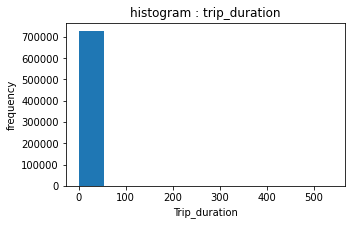

In [116]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['trip_in_hours'], bins=10)
plt.xlabel("Trip_duration")
plt.ylabel('frequency')
plt.title("histogram : trip_duration")
plt.show()


The data is highly skewed tp the left (negative). We will try to remove the outliers in next section

Seems like there is one observation which is causing the plot to misbehave. Lets remove the extreme value.

In [128]:
taxi_data[taxi_data['trip_duration'] == taxi_data['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday_name,pickup_hour,dropoff_weekday_name,dropoff_hour,distance,speed,trip_in_hours
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,Tuesday,0,Wednesday,11,20.148692,0.037394,538.815556


In [129]:
taxi_data.drop(21813, inplace=True)

In [ ]:
#qq plot explain. removed the graph as it used too much memory
sm.qqplot(taxi_data['trip_in_hours'], line='s') 
py.show() 


In [119]:
# calculating points of standard deviation
a_mean = taxi_data['trip_in_hours'].mean()
a_median = taxi_data['trip_in_hours'].median()
a_stdev = taxi_data['trip_in_hours'].mean()- taxi_data['trip_in_hours'].std(), taxi_data['trip_in_hours'].mean()+ taxi_data['trip_in_hours'].std() 

# checking
a_mean, a_median, a_stdev

(0.26450809259985447,
 0.18416666666666667,
 (-0.8089991844226987, 1.3380153696224075))

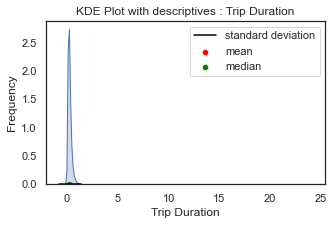

In [132]:
# plotting KDE plot with descriptives
plt.figure(figsize=(5,3))
sns.kdeplot(taxi_data['trip_in_hours'], shade = True)
sns.scatterplot( [a_mean], [0], color='red', label='mean')
sns.scatterplot( [a_median], [0], color='green', label='median')

sns.lineplot( a_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Trip Duration")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Trip Duration")
plt.show()

## Variable - Distance

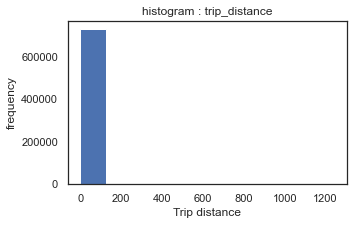

In [28]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['distance'], bins=10)
plt.xlabel("Trip distance")
plt.ylabel('frequency')
plt.title("histogram : trip_distance")
plt.show()


this is again very skewed. Max trips seems to be within 100kms

In [40]:
taxi_data[taxi_data["distance"] > 100].index

Int64Index([ 99568, 244913, 267279, 289975, 310115, 441429, 490372, 495047,
            621372, 654569, 695286, 697620],
           dtype='int64')

There are just 12 such entries where distance is > 100. Drop these

In [43]:
taxi_data.drop(taxi_data[taxi_data["distance"] > 100].index, inplace=True)

In [44]:
#check
taxi_data[taxi_data["distance"] > 100].index

Int64Index([], dtype='int64')

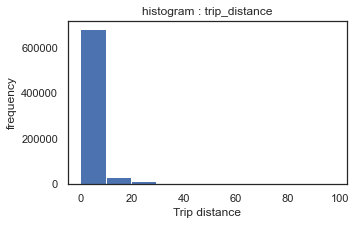

In [45]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['distance'], bins=10)
plt.xlabel("Trip distance")
plt.ylabel('frequency')
plt.title("histogram : trip_distance")
plt.show()


In [52]:
#graph looks much better. Lets check how many records have more than 40kms as distance
taxi_data[taxi_data["distance"] > 40].describe()
#drop these values as well as these are mostly outliers


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,distance,speed
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,-73.934280,40.717148,-73.948865,40.857797,5676.395349,12.209302,10.988372,52.711761,57.152439
std,0.624171,0.137374,0.857969,0.275494,12494.917289,8.253507,8.333482,12.929941,57.177043
min,-79.569733,40.446159,-80.355431,40.293289,548.000000,0.000000,0.000000,40.064600,1.776500
25%,-73.977707,40.645885,-74.362402,40.703012,2873.500000,4.250000,2.000000,42.615627,42.817790
50%,-73.813866,40.689648,-73.805138,40.838633,3446.500000,13.000000,12.000000,48.028486,52.772602
75%,-73.783472,40.754514,-73.517372,41.047381,4461.000000,20.000000,19.000000,60.859778,60.763958
max,-73.593796,41.586273,-72.720734,42.090183,85828.000000,23.000000,23.000000,97.586349,564.208013


In [53]:
taxi_data.drop(taxi_data[taxi_data["distance"] > 40].index, inplace=True)

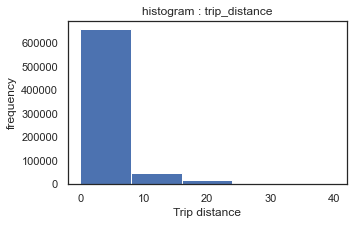

In [55]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['distance'], bins=5)
plt.xlabel("Trip distance")
plt.ylabel('frequency')
plt.title("histogram : trip_distance")
plt.show()


here we can conclude that max trips are less than 10kms

In [57]:
# calculating points of standard deviation
b_mean = taxi_data['distance'].mean()
b_median = taxi_data['distance'].median()
b_stdev = taxi_data['distance'].mean()- taxi_data['distance'].std(), taxi_data['distance'].mean()+ taxi_data['distance'].std() 

# checking
b_mean, b_median, b_stdev

(3.4299114007929985,
 2.095322905143103,
 (-0.47060380633394727, 7.330426607919945))

## Variable - Speed

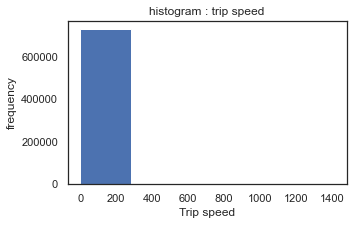

In [58]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['speed'], bins=5)
plt.xlabel("Trip speed")
plt.ylabel('frequency')
plt.title("histogram : trip speed")
plt.show()


Its unlikely that the speed will ever be more than 150km/hr (worst case scenerio)

In [63]:
taxi_data[taxi_data["speed"] > 150].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,distance,speed
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-73.853898,40.582468,-73.865520,40.584441,43.736842,12.842105,12.236842,3.798316,424.946220
std,0.307426,0.880689,0.316755,0.903392,86.099780,6.883299,6.976541,6.459502,373.460909
min,-74.003487,35.310307,-74.004189,35.173546,1.000000,0.000000,0.000000,0.069815,153.559295
25%,-73.967585,40.660339,-73.983221,40.663840,3.000000,9.000000,8.250000,0.318714,191.335987
50%,-73.942181,40.723392,-73.947701,40.732071,7.000000,15.000000,14.500000,0.664472,256.759823
75%,-73.805647,40.769855,-73.811024,40.775052,20.000000,17.000000,17.000000,2.587691,464.397004
max,-72.074333,40.882942,-72.022408,40.851521,355.000000,23.000000,23.000000,21.715139,1410.026735


In [64]:
#drop these values as its mosty error data

taxi_data.drop(taxi_data[taxi_data["speed"] > 150].index, inplace=True)

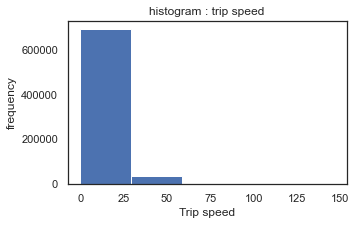

In [65]:
# plotting histogram with 10 bins for trip duration
plt.figure(figsize=(5,3))
plt.hist(taxi_data['speed'], bins=5)
plt.xlabel("Trip speed")
plt.ylabel('frequency')
plt.title("histogram : trip speed")
plt.show()


Max trips are below 25 minutes. Not running KDE as it takes lots of memory

In [67]:
# calculating points of standard deviation
c_mean = taxi_data['speed'].mean()
c_median = taxi_data['speed'].median()
c_stdev = taxi_data['speed'].mean()- taxi_data['speed'].std(), taxi_data['speed'].mean()+ taxi_data['speed'].std() 

# checking
c_mean, c_median, c_stdev

(14.37325391243069,
 12.795681299833067,
 (6.5791623271847515, 22.167345497676628))

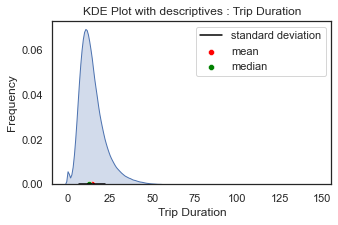

In [68]:
# plotting KDE plot with descriptives
plt.figure(figsize=(5,3))
sns.kdeplot(taxi_data['speed'], shade = True)
sns.scatterplot( [c_mean], [0], color='red', label='mean')
sns.scatterplot( [c_median], [0], color='green', label='median')

sns.lineplot( c_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Trip Duration")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Trip Duration")
plt.show()

In [69]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

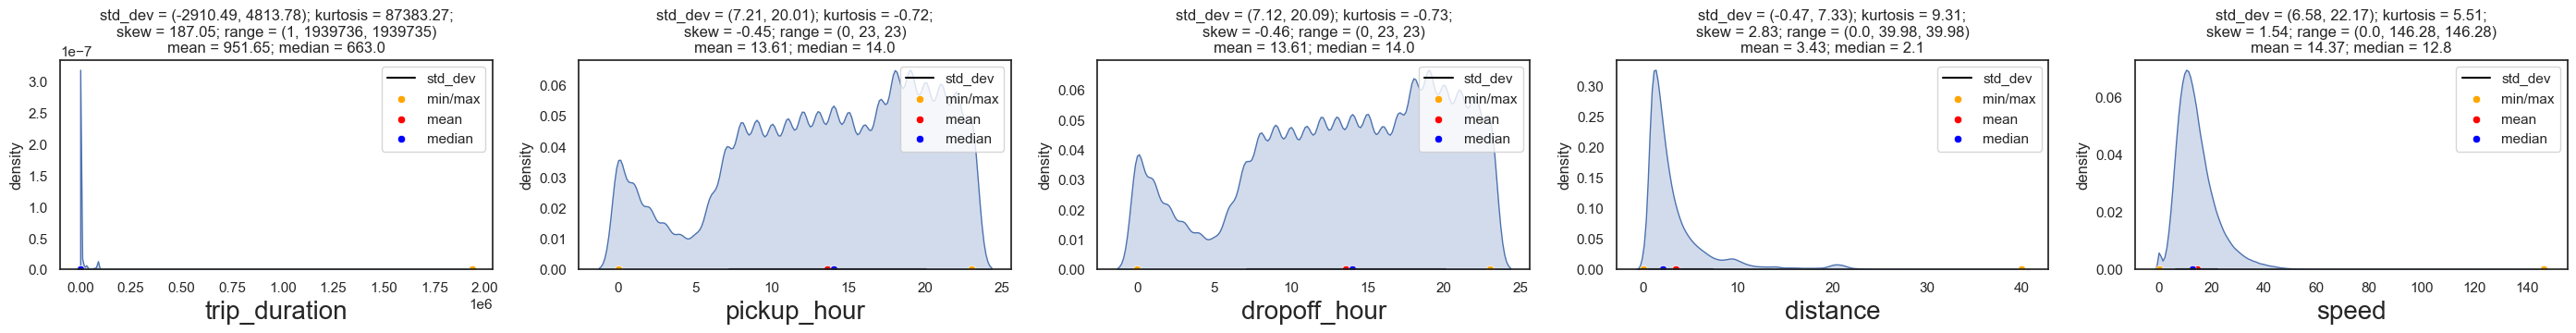

In [71]:
UVA_numeric(taxi_data,continuous_columns)

## Univariate Analysis
 4. Check distribution for categorical variables


In [72]:
taxi_data.dtypes

id                              object
vendor_id                     category
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count               category
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
store_and_fwd_flag            category
trip_duration                    int64
pickup_weekday_name             object
pickup_hour                      int64
dropoff_weekday_name            object
dropoff_hour                     int64
distance                       float64
speed                          float64
dtype: object

In [73]:
taxi_data['pickup_weekday_name'] = taxi_data['pickup_weekday_name'].astype('category')
taxi_data['dropoff_weekday_name'] = taxi_data['dropoff_weekday_name'].astype('category')


In [75]:
categorical_columns = taxi_data.select_dtypes(include = ['category']).columns
categorical_columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'pickup_weekday_name', 'dropoff_weekday_name'],
      dtype='object')

In [76]:
taxi_data['vendor_id'].nunique()

2

In [80]:
taxi_data['vendor_id'].value_counts(normalize=True)

2    0.535389
1    0.464611
Name: vendor_id, dtype: float64

In [81]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

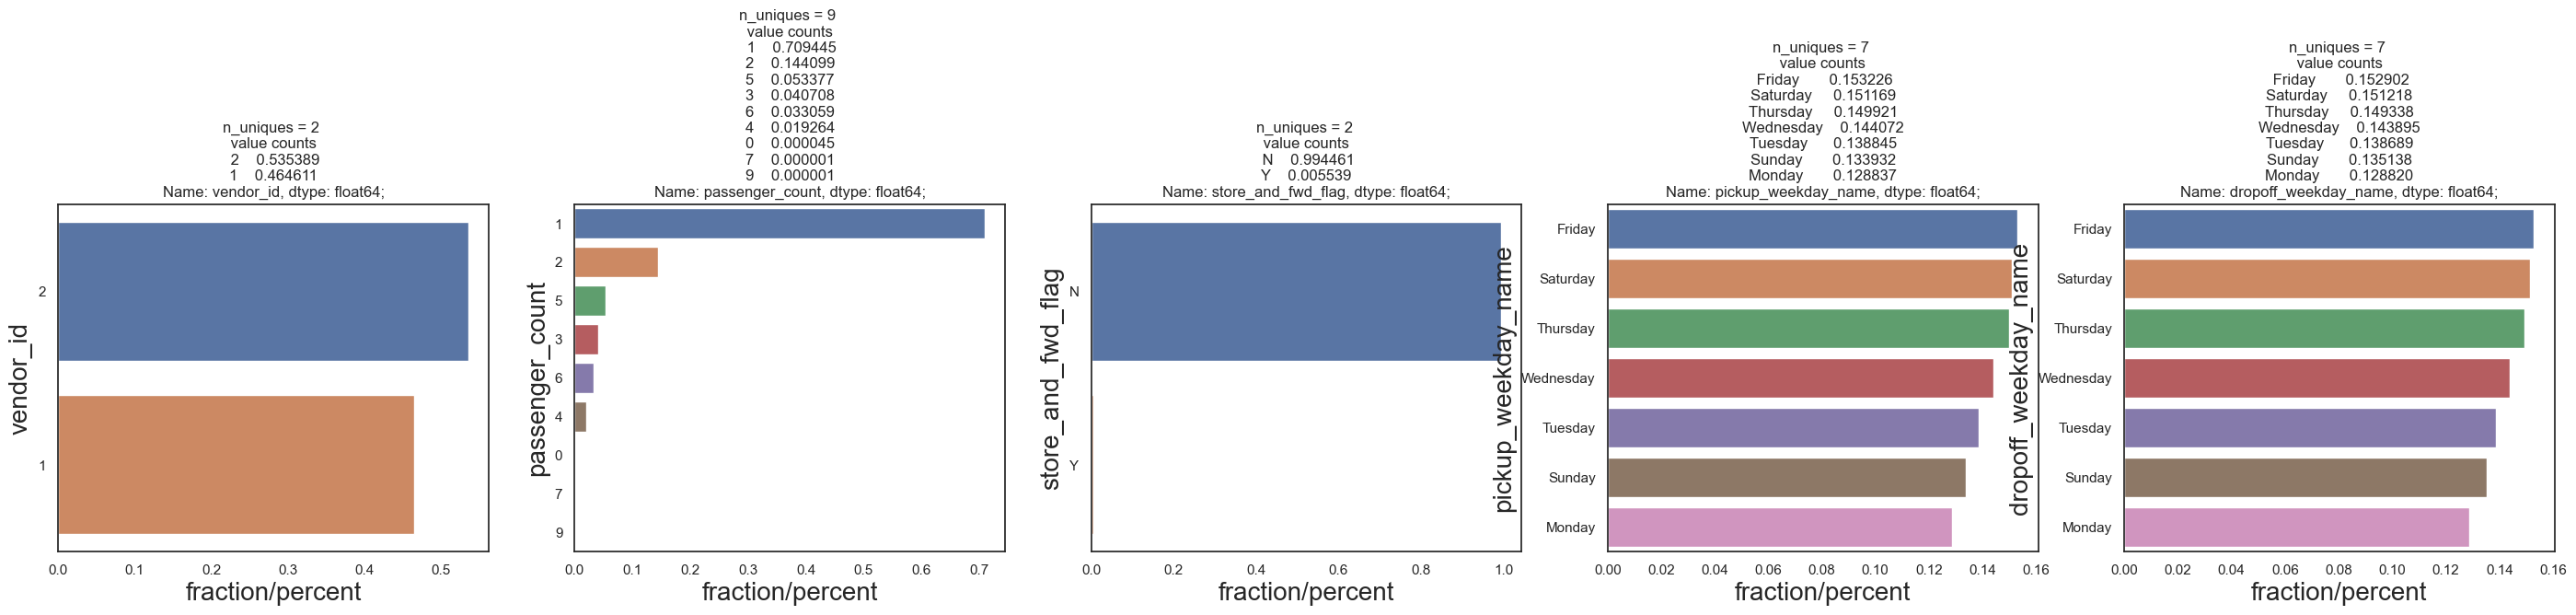

In [82]:
UVA_category(taxi_data, categorical_columns)

Insights:
- max number of trips are taken during the Friday, closely followed by saturday and sunday
- The number of passengers in by large 1. 

## Bivariate Analysis
 6. continuous - continuous


In [83]:
categorical_columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'pickup_weekday_name', 'dropoff_weekday_name'],
      dtype='object')

In [84]:
continuous_columns

Index(['trip_duration', 'pickup_hour', 'dropoff_hour', 'distance', 'speed'], dtype='object')

In [87]:
taxi_data[continuous_columns].corr()

,trip_duration,pickup_hour,dropoff_hour,distance,speed
trip_duration,1.000000,0.002958,0.003038,0.137837,-0.044206
pickup_hour,0.002958,1.000000,0.934675,-0.018606,-0.103986
dropoff_hour,0.003038,0.934675,1.000000,-0.023363,-0.116839
distance,0.137837,-0.018606,-0.023363,1.000000,0.557358
speed,-0.044206,-0.103986,-0.116839,0.557358,1.000000


In [89]:
#unstack it

c = taxi_data[continuous_columns].corr().abs()

s = c.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = pd.DataFrame(so, columns=['trip_duration'])

In [90]:
so[so['trip_duration']<1]

trip_duration
pickup_hour   dropoff_hour        0.934675
dropoff_hour  pickup_hour         0.934675
speed         distance            0.557358
distance      speed               0.557358
              trip_duration       0.137837
trip_duration distance            0.137837
speed         dropoff_hour        0.116839
dropoff_hour  speed               0.116839
speed         pickup_hour         0.103986
pickup_hour   speed               0.103986
speed         trip_duration       0.044206
trip_duration speed               0.044206
dropoff_hour  distance            0.023363
distance      dropoff_hour        0.023363
              pickup_hour         0.018606
pickup_hour   distance            0.018606
trip_duration dropoff_hour        0.003038
dropoff_hour  trip_duration       0.003038
pickup_hour   trip_duration       0.002958
trip_duration pickup_hour         0.002958

#noticed that speed and picup_hour, dropoff_hour have some coorelation

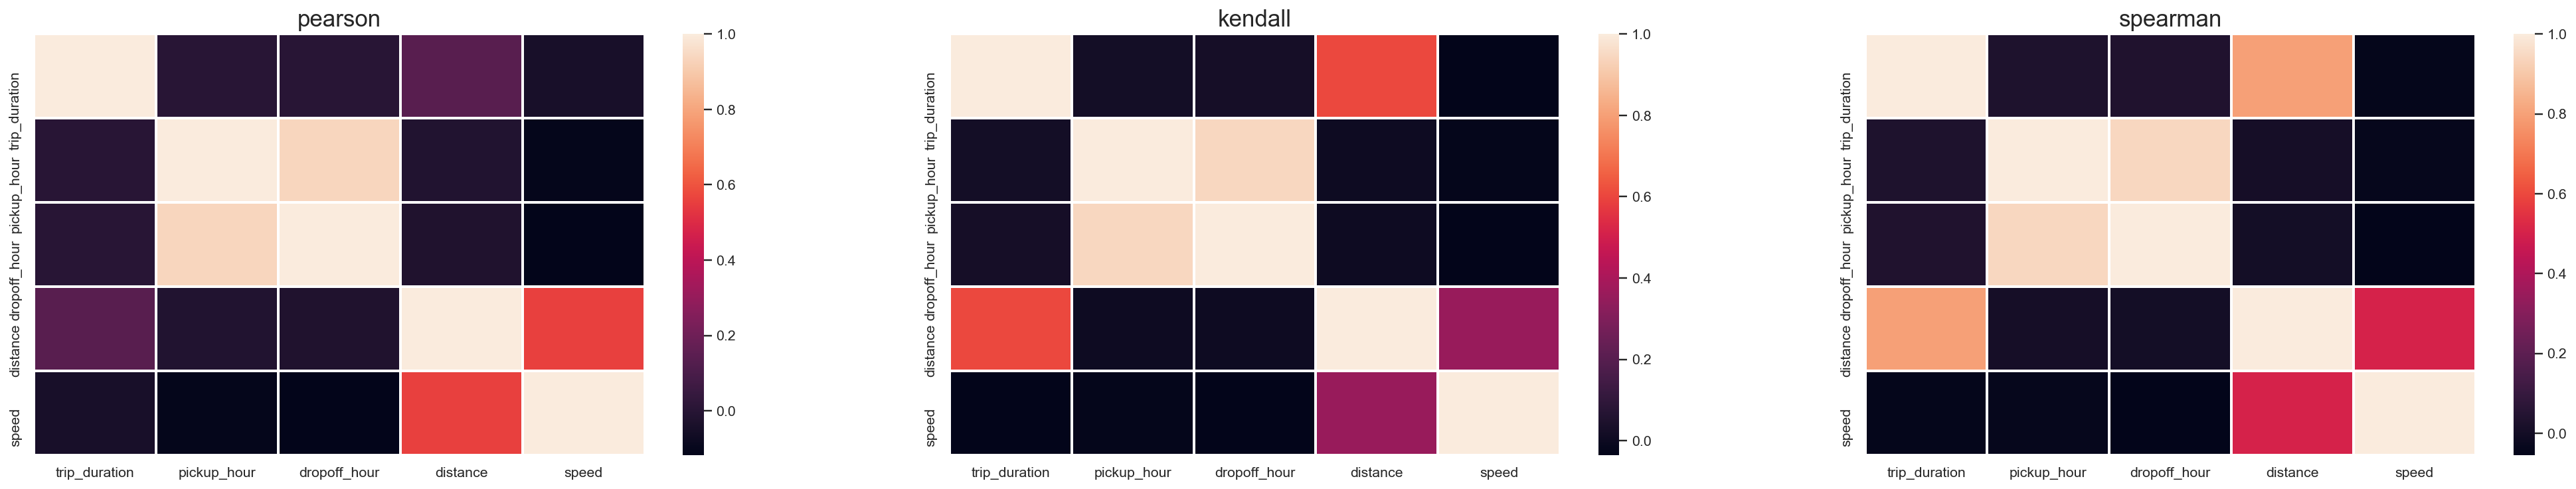

In [91]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = taxi_data[continuous_columns].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
